In [1]:
from helpers import CVPaint, generate_image, generate_image_controlnet, make_image_row

c:\Users\jaspt\miniconda3\envs\diffusers-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Draw

#### run the following cell and draw whatever comes to your head! Use the keybinds shown on the top bar to change colour, size, opacity, and draw/erase mode.

There is a parameter called mask_padding, this makes the mask go that many pixels wider than your drawing. This improves diffusion results, as it gives the diffuser "more room"/"more context" to generate from.


> Please note that erasing will erase the mask + padding. This means if you want the mask to behave as it would if you drew it without erasing, go back over the edges of the erased part with the same brush.

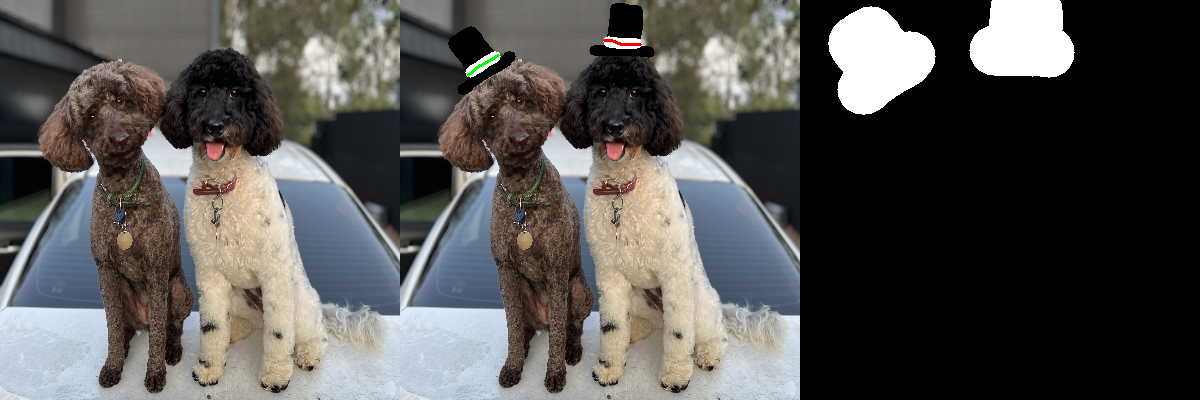

In [ ]:
size=(400,400) # image size
image_filename="images/labradoodle.jpg"

# initialise CVPaint class
window = CVPaint(image_filename, size, mask_padding=20)
img, mask = window.create_window() # create an editing window

make_image_row([window.get_base_pil(), img, mask])

# Generate
#### Add a prompt describing the sort of thing you would like to see, adjust the parameters if you are not getting desired results. Sometimes you also just have to regenerate a couple of times to get the results you want. 

### Hyperparameter tuning
1. `strength` dictates how much noise is added to the mask. Therefore strength of 0 depends entirely on your drawing, and strength of 1 depends entirely on the models choices. You'll want strength to be lower when you want your drawing to dictate "direction" or something hard to describe in words (e.g. a dragon with spikes *here* and wings at *this angle*).

2. `guidance_scale` dictates how much the model "sticks to" the prompt. 7.5-12.5 is generally the standard range. If you set guidance scale too high you will tend to notice a sort of "frying effect".

3. `num_inference_steps` is essentially how many steps it spends generating the image, the general idea is more steps is a better quality image (with diminishing returns of course).

4. the `negative_prompt` is for giving words you want the model to stay away from, as in don't make a "blurry" or "deformed" image.

5. `upscaling_factor` is a trick I stumbled upon by accident (though I'm sure I'm not the first to use it), in which generating the inpainting at a higher resolution than the image generates *significantly* better results. I find this to be especially true for "harder" or more vague prompts (stuff the model is less likely to of trained on).

Begin generating image


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 22.21it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_inpaint.StableDiffusionControlNetInpaintPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loaded pipeline
Created control image


100%|██████████| 30/30 [00:13<00:00,  2.20it/s]


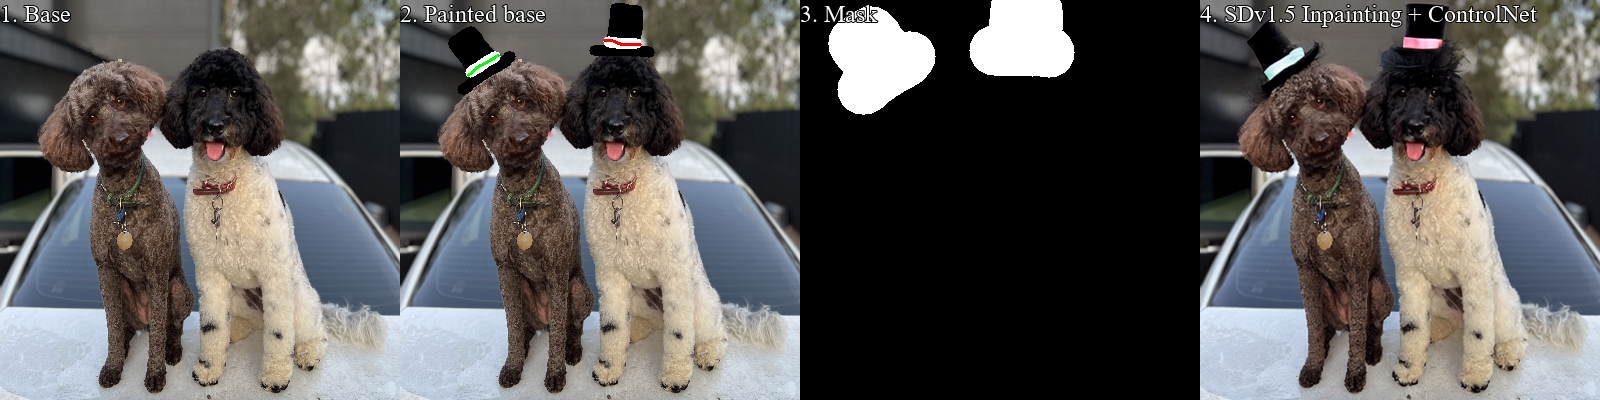

In [ ]:
params = {
    "strength": 0.6,
    "guidance_scale": 10,
    "num_inference_steps": 50,
    "negative_prompt": "blurry, blended, deformed, missing eyes, cartoon, floating"
}
prompt = "Top hat, realistic, colored ribbon, velvet"
upscaling_factor = 2 # Accidentally doubled the height and width while rendering and made results super good for abstract drawings
# Can swap between generate_image and generate_image_controlnet if you want to use an additional controlnet to (hopefully) improve results
imgo = generate_image_controlnet(mask, img, (size[0]*upscaling_factor, size[1]*upscaling_factor), prompt, params).resize(size)
# Saving + rendering
imgo.save("images/output.png")
labels = ["1. Base", "2. Painted base", "3. Mask", "4. SDv1.5 Inpainting + ControlNet"]
make_image_row([window.get_base_pil(), window.get_base_painted_pil(), window.get_mask_pil(), imgo], labels)